In [1]:
install.packages("ggplot2")
install.packages("readr")

Installing package into 'C:/Users/HP/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'farver', 'labeling', 'RColorBrewer', 'viridisLite', 'fansi', 'pkgconfig', 'gtable', 'isoband', 'scales', 'tibble'




package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'fansi' successfully unpacked and MD5 sums checked
package 'pkgconfig' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmpg9ohc1\downloaded_packages


Installing package into 'C:/Users/HP/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'bit', 'prettyunits', 'bit64', 'tidyselect', 'progress', 'clipr', 'hms', 'vroom', 'tzdb'




package 'bit' successfully unpacked and MD5 sums checked
package 'prettyunits' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'progress' successfully unpacked and MD5 sums checked
package 'clipr' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'vroom' successfully unpacked and MD5 sums checked
package 'tzdb' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmpg9ohc1\downloaded_packages


In [3]:
library(ggplot2)
library(readr)

In [19]:
# Loading the Netflix dataset
netflix_data <- read_csv("C:/Users/HP/Downloads/netflix_data.csv")

# Viewing the column names
colnames(netflix_data)

Rows: 6234 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): type, title, director, cast, country, date_added, rating, duration...
dbl  (2): show_id, release_year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "show_id"      "type"         "title"        "director"     "cast"        
 [6] "country"      "date_added"   "release_year" "rating"       "duration"    
[11] "listed_in"    "description"

In [21]:
# Data Cleaning

# Check for missing values
colSums(is.na(netflix_data))

# Fill NA in 'director' and 'cast' with "Unknown"
netflix_data$director[is.na(netflix_data$director)] <- "Unknown"
netflix_data$cast[is.na(netflix_data$cast)] <- "Unknown"

# Define a mode function that wil be used to fill the missing values in the respective columns just like the python code.
get_mode <- function(x) {
  ux <- na.omit(unique(x))
  ux[which.max(tabulate(match(x, ux)))]
}

# Fill 'country', 'date_added', and 'rating' with their respective mode
cols_mode <- c("country", "date_added", "rating")

for (col in cols_mode) {
  mode_value <- get_mode(netflix_data[[col]])
  netflix_data[[col]][is.na(netflix_data[[col]])] <- mode_value
}

# Re-check missing values
colSums(is.na(netflix_data))

show_id         type        title     director         cast      country 
           0            0            0         1969          570          476 
  date_added release_year       rating     duration    listed_in  description 
          11            0           10            0            0            0

show_id         type        title     director         cast      country 
           0            0            0            0            0            0 
  date_added release_year       rating     duration    listed_in  description 
           0            0            0            0            0            0

In [33]:
install.packages('dplyr')
install.packages("viridis")

Warning message:
"package 'dplyr' is in use and will not be installed"
Installing package into 'C:/Users/HP/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'viridis' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmpg9ohc1\downloaded_packages


Loading required package: viridisLite



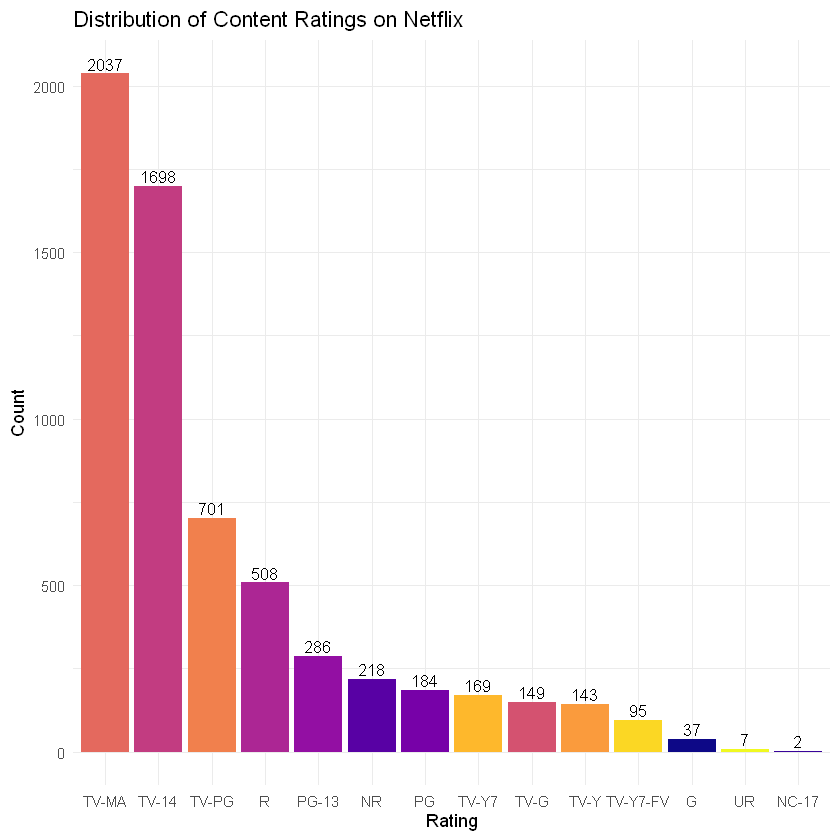

In [35]:
# Plotting ratings distribution.

library(viridis)

ggplot(rating_counts, aes(x = reorder(rating, -n), y = n, fill = rating)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  geom_text(aes(label = n), vjust = -0.3, size = 3.5) +
  labs(
    title = "Distribution of Content Ratings on Netflix",
    x = "Rating", y = "Count"
  ) +
  scale_fill_viridis_d(option = "plasma") +
  theme_minimal()